# Basic Imports

In [1]:
import os #Create directories
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers as layers

# Dataset 

In [8]:
  #Create separate train and validation directory as the structure has been followed in the original dataset.

base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

#Type your code below to check out number of cat and dog images in train and validation folder

print("Number of cat images in train folder:",len(os.listdir(train_cats_dir)))
print("Number of dog images in train folder:",len(os.listdir(train_dogs_dir)))
print("Number of cat images in validation folder:", len(os.listdir(test_cats_dir)))
print("Number of dog images in validation folder:", len(os.listdir(test_dogs_dir)))

Number of cat images in train folder: 1000
Number of dog images in train folder: 1000
Number of cat images in validation folder: 500
Number of dog images in validation folder: 500


# Visualise some dataset

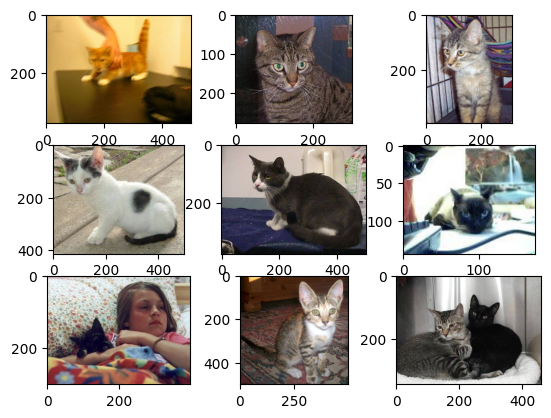

In [19]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = os.path.join(base_dir, train_cats_dir)

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)

    # define filename
    filename = folder + '/cat.' + str(i) + '.jpg' #change the file name to switch between cat and dog images

    # load image pixels
    image = imread(filename)

    # plot raw pixel data
    pyplot.imshow(image)

# show the figure
pyplot.show()


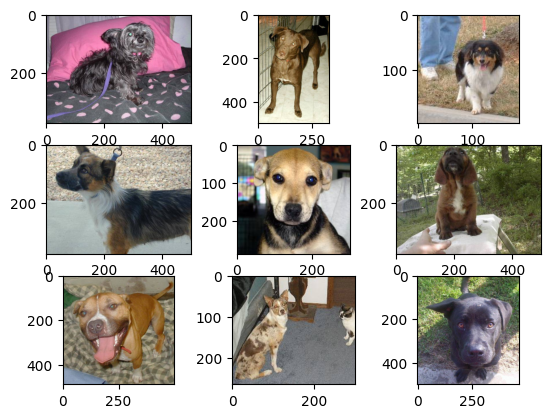

In [20]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = os.path.join(base_dir, train_dogs_dir)

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)

    # define filename
    filename = folder + '/dog.' + str(i) + '.jpg' #change the file name to switch between cat and dog images

    # load image pixels
    image = imread(filename)

    # plot raw pixel data
    pyplot.imshow(image)

# show the figure
pyplot.show()


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by ImageGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Type your code below to generate training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',

)

# Type your code below to generate test/validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',

)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
# Check one batch from train_generator
batch = next(train_generator)
print("Train batch - Images shape:", batch[0].shape)
print("Train batch - Labels shape:", batch[1].shape)

# Check one batch from validation_generator
batch = next(validation_generator)
print("Validation batch - Images shape:", batch[0].shape)
print("Validation batch - Labels shape:", batch[1].shape)


Train batch - Images shape: (20, 150, 150, 3)
Train batch - Labels shape: (20,)
Validation batch - Images shape: (20, 150, 150, 3)
Validation batch - Labels shape: (20,)


# Prevent model overfitting issue

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Type your code below to apply image augmentation techniques on training dataset using the ImageDataGenerator class
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
#Type your code below to add new layers to the existing CNN architecture to improve accuracy

import os
import zipfile
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.optimizers import RMSprop
#from tensorflow.keras.optimizers import SGD

model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64,input_shape=[150,150,3],kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

tf.keras.layers.Dropout(0.5),

tf.keras.layers.Flatten(),

tf.keras.layers.Dense(256,activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid'),

])

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       9,470,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,693,697 (36.98 MB)

 Trainable params: 9,693,697 (36.98 MB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [11]:
train_model_practice = model.fit(
      train_generator,
      steps_per_epoch= 40,  # 2000 images = batch_size * steps
      epochs= 2,
      validation_data=validation_generator,
      validation_steps= 20,  # 1000 images = batch_size * steps
      verbose=2)

C:\Users\Bhupendra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
40/40 - 64s - 2s/step - acc: 0.4837 - loss: 0.7097 - val_acc: 0.6025 - val_loss: 0.6868
Epoch 2/2
40/40 - 59s - 1s/step - acc: 0.5238 - loss: 0.6907 - val_acc: 0.5225 - val_loss: 0.6827


# Training and validation accuracy

C:\Users\Bhupendra\AppData\Local\Temp\ipykernel_15124\2696236026.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training accuracy', color ='tab:blue')
C:\Users\Bhupendra\AppData\Local\Temp\ipykernel_15124\2696236026.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color ='tab:orange')
C:\Users\Bhupendra\AppData\Local\Temp\ipykernel_15124\2696236026.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training Loss', color ='tab:blue')
C:\Users\Bhupendra\AppData\Local\Temp\ipyk

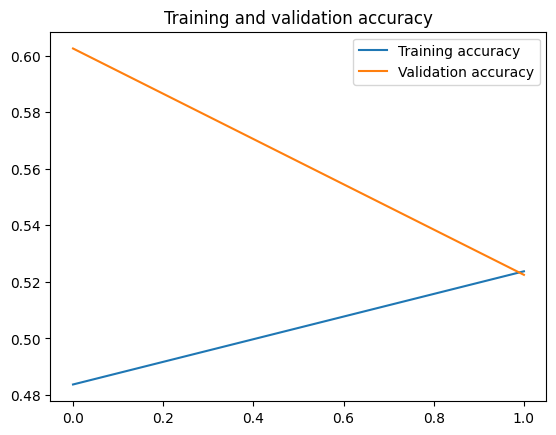

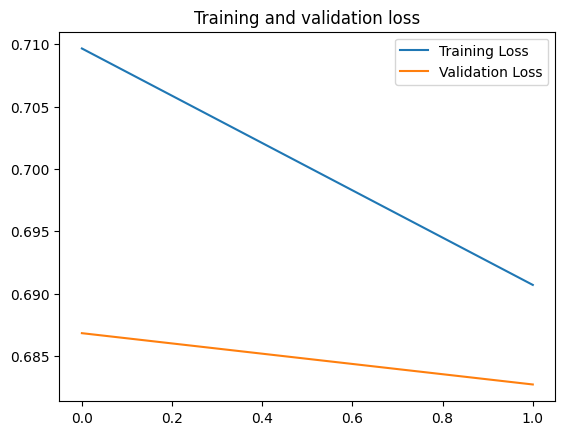

In [12]:
import matplotlib.pyplot as plt
acc = train_model_practice.history['acc']
val_acc = train_model_practice.history['val_acc']
loss = train_model_practice.history['loss']
val_loss = train_model_practice.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy', color ='tab:blue')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy', color ='tab:orange')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss', color ='tab:blue')
plt.plot(epochs, val_loss, 'b', label='Validation Loss', color ='tab:orange')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### TO Directly add path for the image for classification

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
[1.]
This is a dog


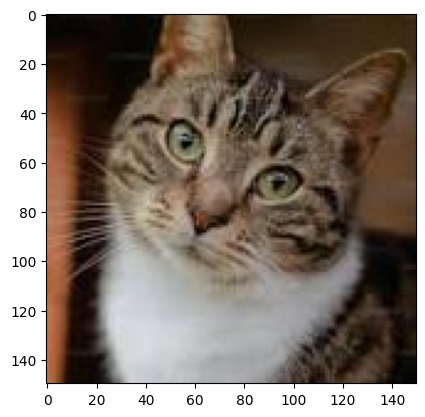

In [14]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as pyplot

# Provide the direct path to the image file
path = "C:/Users/Bhupendra/OneDrive/Pictures/1111.jpeg"  # Change this to your actual image path

# Load and preprocess the image
img = image.load_img(path, target_size=(150,150))  # Resize to 150x150 pixels
pyplot.imshow(img)  # Show the image

x = image.img_to_array(img)  # Convert image to array
x = np.expand_dims(x, axis=0)  # Expand dimensions for model input

images = np.vstack([x])  # Stack into batch format
classes = model.predict(images, batch_size=10)  # Predict using the model

# Display the result
print(classes[0])
if classes[0] > 0.5:
    print("This is a dog")
else:
    print("This is a cat")


### Below part is for google colab

In [ ]:
# Here's a codeblock just for fun. You should be able to upload your pet image here
# and have it classified as either dog or cat

# import numpy as np
# from google.colab import files
# from keras.preprocessing import image
# import matplotlib.pyplot as pyplot
# uploaded = files.upload()

# for fn in uploaded.keys():

#   # predicting images based on the final model_3 we developed during the practice activity
#   path = '/content/' + fn
#   img = image.load_img(path, target_size=(150,150))
#   pyplot.imshow(img)
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model_3.predict(images, batch_size=10)

#   print(classes[0])
#   if classes[0]>0.5:
#     print(fn + " is a dog")
#   else:
#     print(fn + " is a cat")
